In [ ]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd
import timesync_utils as tutils
from tabulate import tabulate

In [ ]:
csv_f_name = "../../data/train_data/martin_train_3_030221.csv"
annot_f_name = "../../data/annotation/training/martin_train_3_030221.txt"


POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

In [ ]:
knn_train = df_wrapper(csv_f_name)
knn_train.concat_sensor_data(3)
knn_train.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  54078
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.019920,-0.794387,-0.601370,-1.562904,-1.464186,-0.498630,-10.045666,-28.373941,-27.243652,...,-1.480040,-20.748009,-36.988220,41.428467,9.834142,-69.666298,0.747616,-0.335055,0.135482,0.557184
1,0.02,0.015635,-0.798804,-0.605099,-1.746947,-0.781661,-0.552266,-10.487769,-28.711199,-27.876856,...,-2.180673,-20.920061,-37.734138,41.424286,9.828160,-69.678291,0.747584,-0.334987,0.135538,0.557254
2,0.04,0.015153,-0.801027,-0.604974,-0.723603,0.261424,-0.555029,-10.635139,-28.458256,-26.610451,...,-2.239058,-20.461252,-36.868870,41.403576,9.871590,-69.696747,0.747453,-0.335022,0.135195,0.557491
3,0.06,0.020163,-0.797502,-0.608591,-0.445173,0.111246,-0.923887,-10.605668,-28.289625,-27.394417,...,-2.151479,-20.432577,-36.809200,41.417000,9.883158,-69.709579,0.747324,-0.335146,0.135219,0.557584
4,0.08,0.026463,-0.787940,-0.609870,-0.919388,-0.897010,-0.986847,-10.664613,-29.441923,-27.243652,...,-1.684391,-20.260525,-37.077728,41.419933,9.901683,-69.730927,0.747169,-0.335222,0.135169,0.557759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54073,1082.08,-0.702289,-0.091232,-0.677052,0.771323,-2.120086,2.219131,-40.315224,5.351791,-21.243278,...,-20.280336,22.322653,-37.734138,-20.050928,-10.376702,-71.308907,0.787686,0.192780,-0.028701,0.584435
54074,1082.10,-0.699011,-0.088285,-0.671266,-0.186748,-1.807720,4.439038,-40.433117,5.632840,-21.213129,...,-20.338724,22.724110,-38.002663,-19.996065,-10.342991,-71.331985,0.787711,0.192232,-0.028697,0.584581
54075,1082.12,-0.723239,-0.084772,-0.665240,0.148049,-2.638496,3.695276,-40.786804,5.773364,-21.786032,...,-20.835005,22.580734,-37.853477,-19.933832,-10.315112,-71.348053,0.787775,0.191664,-0.028603,0.584685
54076,1082.14,-0.722882,-0.090453,-0.662082,-0.800669,-4.035131,1.457107,-40.433117,5.155056,-20.790997,...,-20.864199,22.982191,-38.032505,-19.883596,-10.301021,-71.350899,0.787866,0.191250,-0.028450,0.584707


[[0.0, 123.32, 0], [125.24, 243.28, 1], [245.68, 362.24, 2], [366.72, 484.88, 3], [488.24, 602.08, 4], [605.2, 724.68, 5], [727.72, 842.28, 6], [846.84, 964.12, 7], [966.08, 1081.76, 8]]
Length of knn_train.df before drops: 54078
drops: 1254
length of knn_train.df after drops: 52824
52824
52824


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

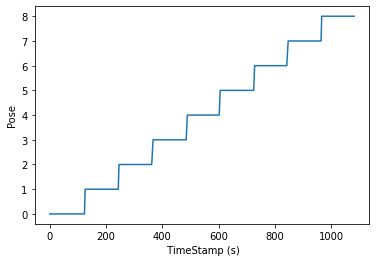

In [ ]:
stamped_poses = get_timestamp_and_pose(annot_f_name, POSE_MAP)
print(stamped_poses)
print("Length of knn_train.df before drops: {}".format(len(knn_train.df.index)))
knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
# print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train.df['SensorId'])

<AxesSubplot:xlabel='Pose', ylabel='Count'>

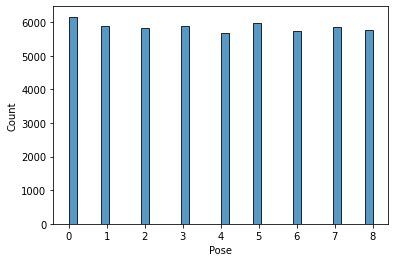

In [ ]:
sns.histplot(data=y_train)

In [ ]:
csv_file = "../../data/test_data/martin_test_3_040221.csv"
annot_file = "../../data/annotation/testing/martin_test_3_040221.txt"

knn_test = df_wrapper(csv_file)
knn_test.concat_sensor_data(3)
knn_test.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  4602
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.015310,-0.788833,-0.614601,-0.289234,0.148599,-0.033029,-9.839348,-28.458256,-28.027618,...,-1.071338,-17.708399,-38.867931,37.483280,10.758442,-132.375031,-0.353097,0.210372,-0.256812,-0.874708
1,0.02,0.016988,-0.793990,-0.618397,-1.066031,2.228461,0.906500,-9.603559,-26.743862,-28.329145,...,-0.721022,-18.281912,-38.748581,37.483467,10.769194,-132.347015,-0.353279,0.210515,-0.256723,-0.874626
2,0.04,0.016548,-0.778584,-0.619201,0.402291,2.340249,1.330297,-9.397241,-27.924265,-27.364267,...,-1.100532,-18.167210,-39.136456,37.473198,10.791303,-132.299423,-0.353598,0.210754,-0.256479,-0.874511
3,0.06,0.016636,-0.779548,-0.616585,-1.681398,2.340109,0.459941,-9.721454,-27.109226,-28.057776,...,-0.983759,-17.966480,-39.136456,37.457188,10.839692,-132.248672,-0.353876,0.211177,-0.256090,-0.874411
4,0.08,0.018946,-0.789322,-0.622949,-1.797317,1.478723,0.090666,-9.691978,-28.036684,-27.937162,...,-1.042145,-17.966480,-38.957439,37.465382,10.898922,-132.218246,-0.353923,0.211709,-0.255885,-0.874323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,91.94,0.120100,-0.493723,-0.858217,10.623210,19.655279,-8.492423,-6.715131,-18.846420,-36.168831,...,5.964177,-9.851303,-42.478168,25.890158,21.628696,-126.950310,-0.389899,0.261877,-0.115215,-0.875285
4598,91.96,0.126508,-0.493604,-0.839787,11.495259,19.904470,-9.395234,-6.449863,-18.509165,-35.987907,...,6.694001,-11.055676,-43.104736,26.183422,21.653545,-126.894440,-0.389593,0.263113,-0.117226,-0.874784
4599,91.98,0.141890,-0.512598,-0.846178,9.437231,16.525085,-8.950869,-6.066706,-18.565372,-36.379890,...,6.372879,-11.715213,-43.134571,26.445723,21.708185,-126.830879,-0.389340,0.264469,-0.118859,-0.874267
4600,92.00,0.148199,-0.524692,-0.842576,10.974522,20.330591,-6.262592,-5.830916,-18.256224,-36.319592,...,6.372879,-10.711570,-42.716862,26.744068,21.763510,-126.739693,-0.389208,0.265981,-0.120698,-0.873615


[[0.0, 10.2, 0], [11.32, 19.96, 1], [20.64, 29.88, 2], [31.12, 40.64, 3], [41.96, 49.96, 4], [51.12, 60.0, 5], [61.32, 70.36, 6], [72.08, 80.28, 7], [81.32, 90.2, 8]]
drops: 563
length of knn_train.df after drops: 4039
4039


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

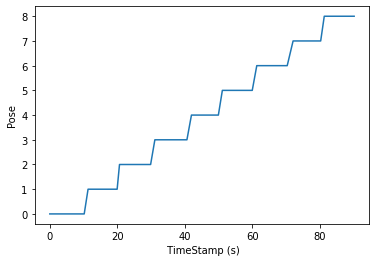

In [ ]:
s_poses = get_timestamp_and_pose(annot_file, POSE_MAP)

print(s_poses)
knn_test.align_poses(s_poses)

y_test = knn_test.df["Pose"]  # df_test["Pose"]

sns.lineplot(data=knn_test.df, x=" TimeStamp (s)", y='Pose')

<AxesSubplot:xlabel='Pose', ylabel='Count'>

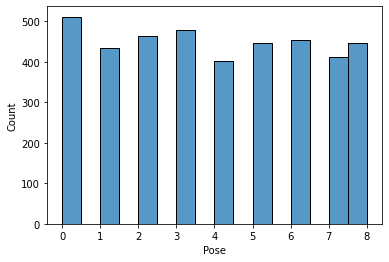

In [ ]:
sns.histplot(data=y_test)

In [ ]:
#print(knn_train.df)
x_train = knn_train.df.drop([' TimeStamp (s)', 'Pose'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 

x_train_numpy = x_train.values
x_test_numpy = x_test.values

In [ ]:
len(POSE_MAP)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(52824, 48)
(4039, 48)
(52824,)


### Keras Model

Leger en enkel modell

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

LR = 0.001
EPOCH = 50_00
BATCH_SIZE = 10_000
AMOUNT_OF_SENSORS = 3
ACTIVATION1 = 'relu'
#OPTIM = 'adam'
OPTIM = 'rmsprop'

"""
model = tf.keras.Sequential()
model.add(Dense(16,input_dim=16, activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(9,activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), epochs=10, batch_size=64)
"""

def get_compiled_model(input_shape=(AMOUNT_OF_SENSORS*16)+1, output_shape=len(POSE_MAP), lr=LR):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(AMOUNT_OF_SENSORS, activation=ACTIVATION1),
        tf.keras.layers.Dense(int((AMOUNT_OF_SENSORS + output_shape)/2), activation=ACTIVATION1),
        tf.keras.layers.Dense(output_shape)
    ])

    #model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    return model



In [ ]:
model = get_compiled_model()
#history = model.fit(np.array(x_train), np.array(y_train), epochs=EPOCH, batch_size=BATCH_SIZE)
history = model.fit(np.array(x_train), np.array(y_train), epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0)

In [ ]:
y_test.index = [i for i in range(len(y_test))]

In [ ]:
#y_new = predict_classes(np.array(x_test))
y_new = np.argmax(model.predict(np.array(x_test)), axis=-1)
failed = [i for i in y_test.index if (y_test[i] != y_new[i])]

print(f"Precision: {100-(len(failed)/len(y_test))*100}")

Precision: 11.017578608566481


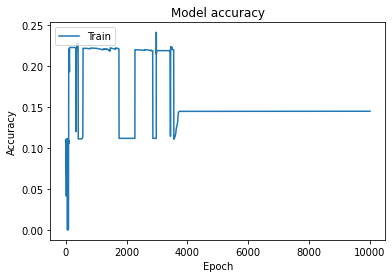

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
"""
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
"""

'\n#Normalizing the data\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX = sc.fit_transform(X)\n'

### Pytorch Model

Lager en enkel modell med 2 lineære lag

In [ ]:
"""
import torch
import torch.nn as nn
import torch.optim as optim

class Model(nn.Module):
    def __init__(self, input_shape=49, output_shape=9, lr=0.001):
        super(Model, self).__init__()
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.lr = lr
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_shape, 25),
            torch.nn.ReLU(),
            torch.nn.Linear(25, output_shape),
        )
        self.opt = optim.SGD(self.net.parameters(), lr=lr, momentum=0.9)
        #self.opt = optim.Adam(self.net.parameters(), lr=lr)
        #self.opt = optim.RMSprop(self.net.parameters(), lr=lr)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.net(x)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.forward(x).argmax(1), y.argmax(1)).float())

    """
    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)
    """
    def loss(self, x, y):
        return self.criterion(self.forward(x), y)
"""

IndentationError: unexpected indent (<ipython-input-17-fb6e219b2e26>, line 30)

### Training

Denne er hentet ut fra [Pytorch egen nettside](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [ ]:
"""
LR = 0.001
EPOCH = 100
AMOUNT_OF_SENSORS = 3

model = Model(input_shape=(AMOUNT_OF_SENSORS*16)+1, output_shape=len(POSE_MAP), lr=LR)

Vi må dele opp i rader og skille ut en 7tensor med dataattributter og en tensor med labels
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(x_train, 0):
        # zero the parameter gradients
        model.opt.zero_grad()

        # forward + backward + optimize
        outputs = model.forward(inputs)
        loss = model.criterion(outputs, labels)
        loss.backward()
        model.opt.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

results = []
for index, epoch in enumerate(range(EPOCH)):
    model.opt.zero_grad()

    # forward + backward + optimize
    loss = model.loss(torch.tensor(x_train.values), torch.tensor(y_train.values))
    loss.backward()
    model.opt.step()

    if (index+1) % 10 == 0:
        print(f'epoch = {index+1}, loss = {model.loss(x_train, y_train).item()}, accuracy = {model.accuracy(x_test, y_test).item() * 100}%')
        results.append([index+1, model.loss(x_train, y_train).item(),
                        model.accuracy(x_test, y_test).item() * 100])

    model.loss(x_train, y_train).backward()  # Compute loss gradients
    model.opt.step()  # Perform optimization by adjusting W and b

print(tabulate.tabulate(results, headers=['epoch', 'loss', 'accuracy']))
"""

RuntimeError: mat1 and mat2 shapes cannot be multiplied (59233x16 and 49x25)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>